In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
PATH = "archive/"

In [4]:
import glob

# Tüm alt klasörlerdeki jpg ve png dosyalarını alalım
image_paths = glob.glob(PATH + "**/images/*.[jp][pn]g", recursive=True)

print(f"Toplam {len(image_paths)} resim bulundu.")

Toplam 112120 resim bulundu.


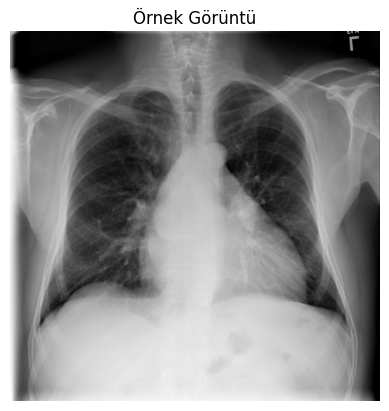

In [4]:
img = Image.open(image_paths[0]).convert("L")
plt.imshow(img, cmap='gray')
plt.title("Örnek Görüntü")
plt.axis("off")
plt.show()

In [45]:
all_image_sizes = []

for subfolder in os.listdir(PATH):
    images_folder = os.path.join(PATH, subfolder, "images")
    
    if os.path.exists(images_folder):
        for file in os.listdir(images_folder):
            if file.endswith((".jpg", ".png", ".jpeg", ".bmp")):
                img_path = os.path.join(images_folder, file)
                try:
                    img = Image.open(img_path)
                    all_image_sizes.append(img.size)  # (width, height)
                except Exception as e:
                    print(f"Hata: {img_path} - {e}")

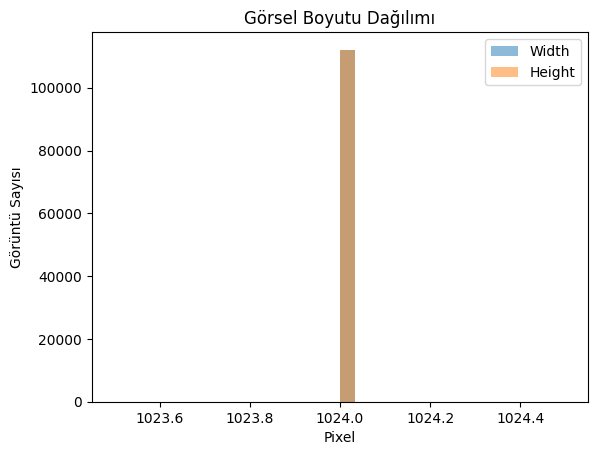

In [46]:
widths = [w for w, h in all_image_sizes]
heights = [h for w, h in all_image_sizes]

plt.hist(widths, bins=30, alpha=0.5, label="Width")
plt.hist(heights, bins=30, alpha=0.5, label="Height")
plt.legend()
plt.title("Görsel Boyutu Dağılımı")
plt.xlabel("Pixel")
plt.ylabel("Görüntü Sayısı")
plt.show()

In [47]:
list(dict.fromkeys(widths))

[1024]

In [48]:
list(dict.fromkeys(heights))

[1024]

In [9]:
print(img.mode)

L


In [10]:
df2 = pd.read_csv(PATH+"BBox_List_2017.csv")
df2

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
979,00029464_015.png,Atelectasis,198.940451,352.900747,615.537778,323.128889,NaN,NaN,NaN
980,00025769_001.png,Atelectasis,701.838229,572.491858,103.537778,63.715556,NaN,NaN,NaN
981,00016837_002.png,Atelectasis,140.913785,658.962969,271.928889,94.435556,NaN,NaN,NaN
982,00020124_003.png,Atelectasis,175.047118,580.456302,244.622222,103.537778,NaN,NaN,NaN


In [5]:
df = pd.read_csv(PATH+"Data_Entry_2017.csv")
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


In [12]:
df.columns = df.columns.str.strip() \
                       .str.replace('[', '', regex=False) \
                       .str.replace(']', '', regex=False) \
                       .str.replace('#', 'num') \
                       .str.replace(' ', '_') \
                       .str.replace('-', '_') \
                       .str.replace('(', '') \
                       .str.replace(')', '')


In [7]:
import os

# full_paths listesini dosya adlarına göre bir sözlük haline getir
path_dict = {os.path.basename(path): path for path in image_paths}

# df'ye tam path sütunu ekle
df['full_path'] = df['Image Index'].map(path_dict)

In [8]:
df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,full_path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,archive/images_001/images/00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,archive/images_001/images/00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,archive/images_001/images/00000001_002.png
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,archive/images_001/images/00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,archive/images_001/images/00000003_000.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN,archive/images_012/images/00030801_001.png
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN,archive/images_012/images/00030802_000.png
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN,archive/images_012/images/00030803_000.png
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN,archive/images_012/images/00030804_000.png


In [13]:
df['image_path'] = image_paths

In [14]:
df

,Image_Index,Finding_Labels,Follow_up_num,Patient_ID,Patient_Age,Patient_Gender,View_Position,OriginalImageWidth,Height,OriginalImagePixelSpacingx,y,Unnamed:_11,image_path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,archive\images_001\images\00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,archive\images_001\images\00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,archive\images_001\images\00000001_002.png
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,archive\images_001\images\00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,archive\images_001\images\00000003_000.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN,archive\images_012\images\00030801_001.png
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN,archive\images_012\images\00030802_000.png
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN,archive\images_012\images\00030803_000.png
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN,archive\images_012\images\00030804_000.png


In [15]:
df.iloc[1]['image_path']

'archive\\images_001\\images\\00000001_001.png'

In [16]:
df.iloc[1]['View_Position']

'PA'

In [17]:
from sklearn.model_selection import train_test_split
def split_data(df,test_size,random_state=42):
    # Benzersiz hasta ID'lerini al
    unique_patients = df['Patient_ID'].unique()

    # Hastaları train ve test olarak ayır
    train_patients, test_patients = train_test_split(unique_patients, test_size=test_size, random_state=random_state)

    # Orijinal dataframe'den ayır
    train_df = df[df['Patient_ID'].isin(train_patients)].reset_index(drop=True)
    test_df = df[df['Patient_ID'].isin(test_patients)].reset_index(drop=True)

    # Kontrol için
    print(f"Toplam hasta: {len(unique_patients)}")
    print(f"Train hasta sayısı: {len(train_patients)}")
    print(f"Test hasta sayısı: {len(test_patients)}")
    print(f"Train set boyutu: {len(train_df)}")
    print(f"Test set boyutu: {len(test_df)}")
    return train_df , test_df

In [18]:
df

,Image_Index,Finding_Labels,Follow_up_num,Patient_ID,Patient_Age,Patient_Gender,View_Position,OriginalImageWidth,Height,OriginalImagePixelSpacingx,y,Unnamed:_11,image_path
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,archive\images_001\images\00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,archive\images_001\images\00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,archive\images_001\images\00000001_002.png
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,archive\images_001\images\00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,archive\images_001\images\00000003_000.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN,archive\images_012\images\00030801_001.png
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN,archive\images_012\images\00030802_000.png
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN,archive\images_012\images\00030803_000.png
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN,archive\images_012\images\00030804_000.png


In [19]:
df.columns

Index(['Image_Index', 'Finding_Labels', 'Follow_up_num', 'Patient_ID',
       'Patient_Age', 'Patient_Gender', 'View_Position', 'OriginalImageWidth',
       'Height', 'OriginalImagePixelSpacingx', 'y', 'Unnamed:_11',
       'image_path'],
      dtype='object')

In [20]:
df.describe()

,Follow_up_num,Patient_ID,Patient_Age,OriginalImageWidth,Height,OriginalImagePixelSpacingx,y,Unnamed:_11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Image_Index                 112120 non-null  object 
 1   Finding_Labels              112120 non-null  object 
 2   Follow_up_num               112120 non-null  int64  
 3   Patient_ID                  112120 non-null  int64  
 4   Patient_Age                 112120 non-null  int64  
 5   Patient_Gender              112120 non-null  object 
 6   View_Position               112120 non-null  object 
 7   OriginalImageWidth          112120 non-null  int64  
 8   Height                      112120 non-null  int64  
 9   OriginalImagePixelSpacingx  112120 non-null  float64
 10  y                           112120 non-null  float64
 11  Unnamed:_11                 0 non-null       float64
 12  image_path                  112120 non-null  object 
dtypes: float64(3),

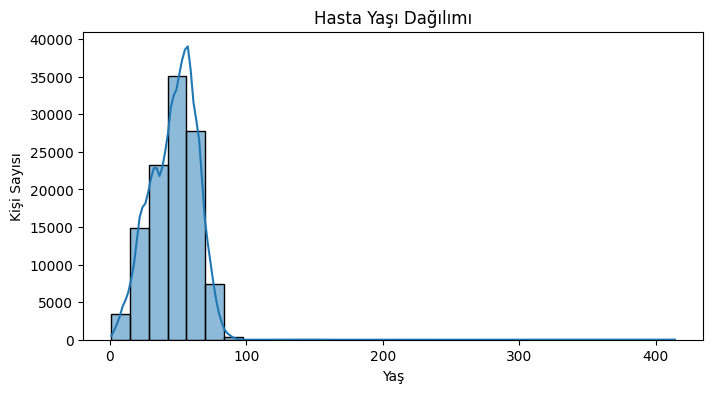

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['Patient_Age'].dropna(), bins=30, kde=True)
plt.title("Hasta Yaşı Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Kişi Sayısı")
plt.show()


In [23]:
df['Patient_Age'].describe()

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient_Age, dtype: float64

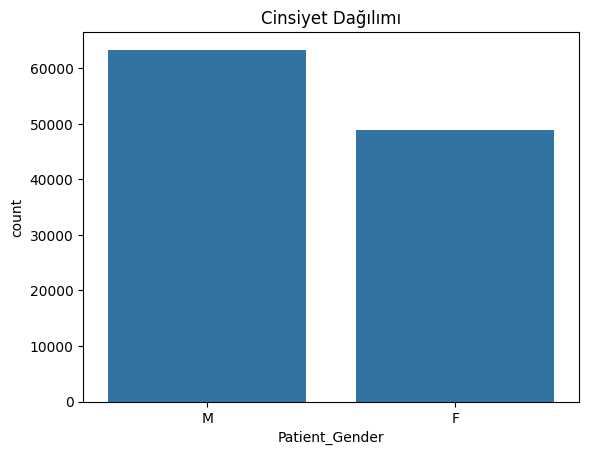

In [24]:
sns.countplot(data=df, x="Patient_Gender")
plt.title("Cinsiyet Dağılımı")
plt.show()


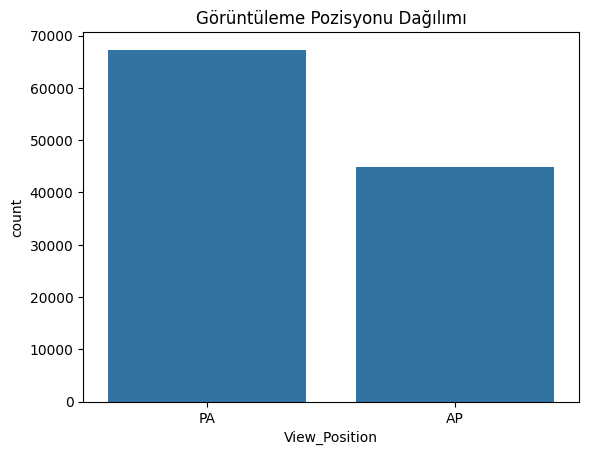

In [25]:
sns.countplot(data=df, x="View_Position")
plt.title("Görüntüleme Pozisyonu Dağılımı")
plt.show()

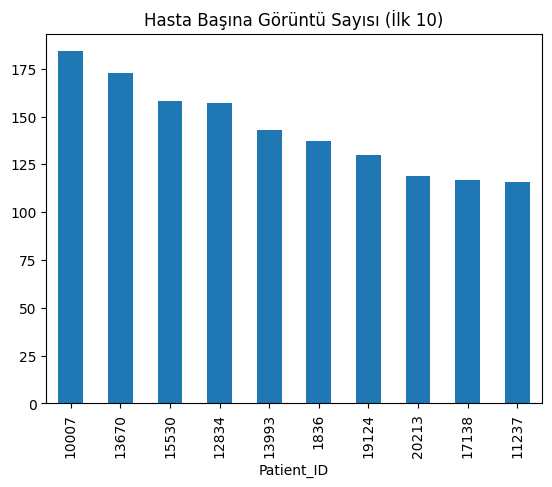

In [26]:
df['Patient_ID'].value_counts().head(10).plot(kind='bar')
plt.title("Hasta Başına Görüntü Sayısı (İlk 10)")
plt.show()

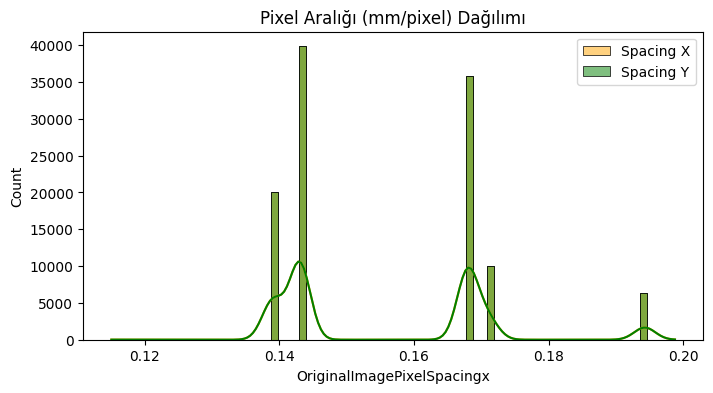

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(df["OriginalImagePixelSpacingx"].dropna(), label="Spacing X", color="orange", kde=True)
sns.histplot(df["y"].dropna(), label="Spacing Y", color="green", kde=True)
plt.legend()
plt.title("Pixel Aralığı (mm/pixel) Dağılımı")
plt.show()


In [28]:
target_file = df.iloc[0,0]
target_file

'00000001_000.png'

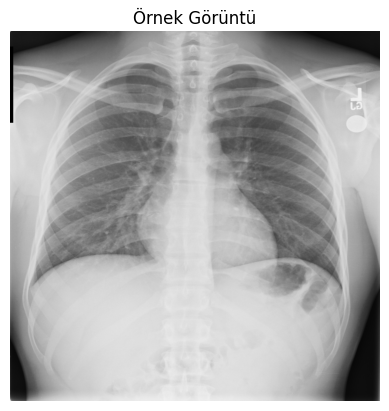

In [29]:
img = Image.open(path).convert("L")
plt.imshow(img, cmap='gray')
plt.title("Örnek Görüntü")
plt.axis("off")
plt.show()

In [30]:
df.columns

Index(['Image_Index', 'Finding_Labels', 'Follow_up_num', 'Patient_ID',
       'Patient_Age', 'Patient_Gender', 'View_Position', 'OriginalImageWidth',
       'Height', 'OriginalImagePixelSpacingx', 'y', 'Unnamed:_11',
       'image_path'],
      dtype='object')

In [31]:
df.loc[df['View_Position'] == 'AP', 'View_Position'] = 0
df.loc[df['View_Position'] == 'PA', 'View_Position'] = 1

In [32]:
df.head()

,Image_Index,Finding_Labels,Follow_up_num,Patient_ID,Patient_Age,Patient_Gender,View_Position,OriginalImageWidth,Height,OriginalImagePixelSpacingx,y,Unnamed:_11,image_path
0,00000001_000.png,Cardiomegaly,0,1,58,M,1,2682,2749,0.143,0.143,NaN,archive\images_001\images\00000001_000.png
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,1,2894,2729,0.143,0.143,NaN,archive\images_001\images\00000001_001.png
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,1,2500,2048,0.168,0.168,NaN,archive\images_001\images\00000001_002.png
3,00000002_000.png,No Finding,0,2,81,M,1,2500,2048,0.171,0.171,NaN,archive\images_001\images\00000002_000.png
4,00000003_000.png,Hernia,0,3,81,F,1,2582,2991,0.143,0.143,NaN,archive\images_001\images\00000003_000.png


In [34]:
df.iloc[1,0]

'00000001_001.png'

In [35]:
image_paths[1]

'archive\\images_001\\images\\00000001_001.png'

In [36]:
train_df , test_df = split_data(df,0.1)

Toplam hasta: 30805
Train hasta sayısı: 27724
Test hasta sayısı: 3081
Train set boyutu: 101170
Test set boyutu: 10950


In [37]:
import torch
from dataset import ChestXrayDataset
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim

In [38]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [39]:
train_dataset = ChestXrayDataset(train_df, transform=transform)
test_dataset = ChestXrayDataset(test_df, transform=transform)

In [40]:
from train import train
from evaluation import plot_results,eval_on_metrics
import torchvision.models as models
EPOCHS = 3
num_classes = 2

In [41]:
def get_model(num_classes):
    model = models.resnet34(pretrained=True)

    for param in model.parameters():
        param.requires_grad = False

    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_classes)

    for param in model.fc.parameters():
        param.requires_grad = True

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    return model,criterion,optimizer,device

In [ ]:
def train_and_evaluate(model, train_loader, test_loader, criterion, optimizer, device, num_epochs, save_path):
   
    model.to(device)

    
    epoch_losses, epoch_accuracies = train(model, train_loader, criterion, optimizer, device, num_epochs=num_epochs)

    
    torch.save(model.state_dict(), save_path)
    print(f"Model weights saved to {save_path}")

    
    plot_results(num_epochs, epoch_losses, epoch_accuracies)

    
    eval_on_metrics(model, test_loader)


In [43]:
train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True,num_workers=6)
test_dataloader = DataLoader(test_dataset, batch_size=128, shuffle=True,num_workers=6)
model,criterion,optimizer,device = get_model(num_classes)

c:\Users\Furkan-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Furkan-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


cuda


Epoch 1/3: 100%|██████████| 791/791 [06:39<00:00,  1.98it/s]


Epoch [1/3], Loss: 0.0917, Accuracy: 0.9726


Epoch 2/3: 100%|██████████| 791/791 [07:51<00:00,  1.68it/s]


Epoch [2/3], Loss: 0.0562, Accuracy: 0.9842


Epoch 3/3: 100%|██████████| 791/791 [06:14<00:00,  2.11it/s]


Epoch [3/3], Loss: 0.0508, Accuracy: 0.9858
Model weights saved to models/model_weights.pth


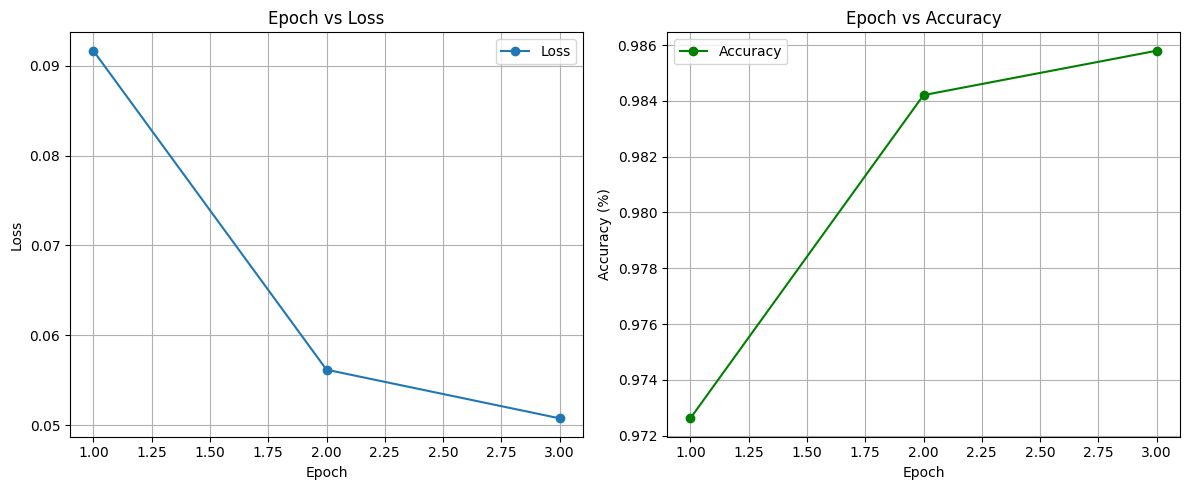

Evaluating: 100%|██████████| 86/86 [00:55<00:00,  1.55it/s]

Precision: 0.9891
Recall:    0.9873
F1 Score:  0.9882
AUC:       0.9967


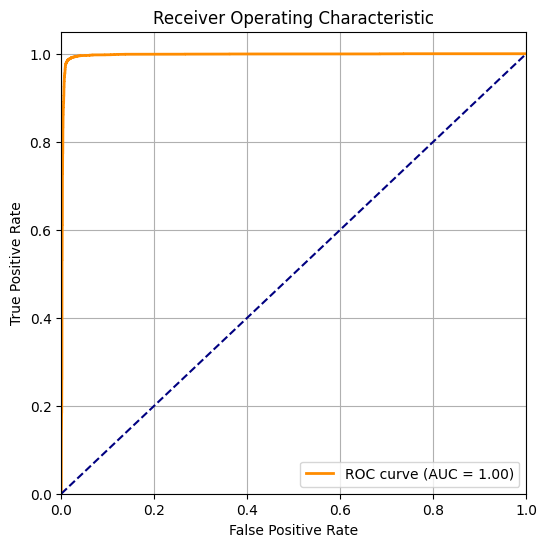

In [44]:
print(device)
train_and_evaluate(model,train_dataloader,test_dataloader,criterion,optimizer,device,EPOCHS,"models/model_weights.pth")